Populating the interactive namespace from numpy and matplotlib


/home/liamk/anaconda2/envs/davitpy_latest/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Getting conductance with solar True, aurora True, fluxtypes ('diff',), background_ped: 0.1, background_hall 0.1
Cached OMNI called for 2010-05-29 12:00:00
Created new OI: 2010-05-28 00:00:00-2010-05-31 00:00:00
Cached OMNI called for 2010-05-29 12:00:00
36.0,36.0
Using cached OI: 2010-05-28 00:00:00-2010-05-31 00:00:00
Cached OMNI called for 2010-05-29 12:00:00
36.0,36.0
Using cached OI: 2010-05-28 00:00:00-2010-05-31 00:00:00


/home/liamk/mirror/Projects/davitpy_latest/ovationpyme/ovationpyme/ovation_prime.py:322: RuntimeWarning: divide by zero encountered in divide
  grideavg = (gridenergyflux/1.6e-12)/gridnumflux #energy flux Joules->eV
/home/liamk/mirror/Projects/davitpy_latest/ovationpyme/ovationpyme/ovation_prime.py:322: RuntimeWarning: invalid value encountered in divide
  grideavg = (gridenergyflux/1.6e-12)/gridnumflux #energy flux Joules->eV


Zeroed 4318/7680 average energieswith numflux below 5.000000e+07
Zeroed 0/7680 average energies over 30 keV
Zeroed 4986/7680 average energies under .2 keV
Cached OMNI called for 2010-05-29 12:00:00
Created new OI: 2010-05-28 00:00:00-2010-05-31 00:00:00
Getting conductance with solar True, aurora True, fluxtypes ('diff',), background_ped: 0.1, background_hall 0.1
Cached OMNI called for 2010-05-29 12:00:00
36.0,36.0
Using cached OI: 2010-05-28 00:00:00-2010-05-31 00:00:00
Cached OMNI called for 2010-05-29 12:00:00
36.0,36.0
Using cached OI: 2010-05-28 00:00:00-2010-05-31 00:00:00
Cached OMNI called for 2010-05-29 12:00:00
36.0,36.0
Using cached OI: 2010-05-28 00:00:00-2010-05-31 00:00:00
Zeroed 4233/7680 average energieswith numflux below 5.000000e+07
Zeroed 0/7680 average energies over 30 keV
Zeroed 4940/7680 average energies under .2 keV
Cached OMNI called for 2010-05-29 12:00:00
36.0,36.0
Using cached OI: 2010-05-28 00:00:00-2010-05-31 00:00:00


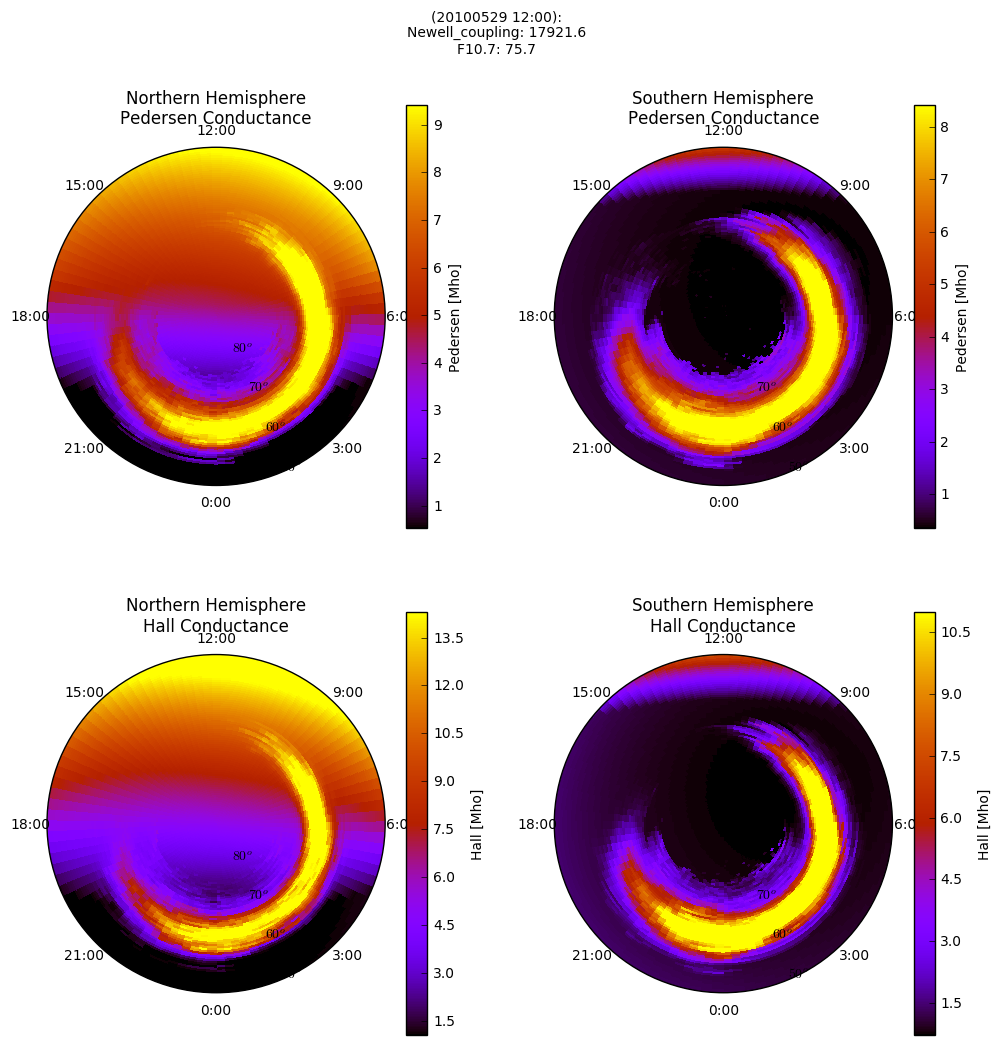

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from ovationpyme.ovation_prime import ConductanceEstimator
from ovationpyme.ovation_utilities import calc_avg_solarwind
from ovationpyme.ovation_plotting import latlt2polar,polar2dial,pcolor_flux
import ipywidgets
from collections import OrderedDict
from functools import partial

auroral_types = ['diff','mono','wave']

def plot_date_fluxes_callback(clicked_button,widgets):
    f = plt.figure(figsize=(12,12),dpi=150)
    axpN = f.add_subplot(221,projection='polar')
    axpS = f.add_subplot(222,projection='polar')
    axhN = f.add_subplot(223,projection='polar')
    axhS = f.add_subplot(224,projection='polar')
    atypes = widgets['atype_select'].value
    bincorrect = widgets['bincorrect_toggle'].value
    solar_conductance = widgets['solar_toggle'].value
    nflux_threshold = widgets['nflux_thresh_float'].value
    eavg_threshold = widgets['eavg_thresh_float'].value
    manual_f107 = widgets['f107_float'].value
    manual_newell = widgets['newell_float'].value
    year = widgets['year'].value
    month = widgets['month'].value
    day = widgets['day'].value
    hour = widgets['hour'].value
    minute = widgets['minute'].value
    dt = datetime.datetime(year,month,day,hour,minute)
    start_dt=dt-datetime.timedelta(days=1)
    end_dt=dt+datetime.timedelta(days=1)
    dtstr = dt.strftime('%Y%m%d %H:%M')
    estimator = ConductanceEstimator(fluxtypes=atypes)
    if manual_newell != -1:
        for nfest,eavest in zip(estimator.nflux_estimator,estimator.eavg_estimator):
            nfest._dF = manual_newell
            eavest._dF = manual_newell
    if manual_f107 != -1:
        estimator._f107 = manual_f107
    get_cond_kwargs = {'solar':solar_conductance,
                        'background_p':0.1,'background_h':0.1,
                        'conductance_fluxtypes':atypes,
                        'interp_bad_bins':bincorrect,
                        'return_dF':True,'return_f107':True,
                        'dnflux_bad_thresh':nflux_threshold,
                        'deavg_bad_thresh':eavg_threshold}
    condtupleN = estimator.get_conductance(dt,hemi='N',**get_cond_kwargs)
    mlatgridN,mltgridN,pedgridN,hallgridN,newell_coupling,f107 = condtupleN
    condtupleS = estimator.get_conductance(dt,hemi='S',**get_cond_kwargs)
    mlatgridS,mltgridS,pedgridS,hallgridS,newell_coupling,f107 = condtupleS
    pcolor_kwargs = {'cmap':'gnuplot','alpha':1.0}
    manual_vmin = wgts['vmin_float'].value
    if manual_vmin != -1.:
        pcolor_kwargs['vmin']=manual_vmin
    manual_vmax = wgts['vmax_float'].value
    if manual_vmax != -1.:
        pcolor_kwargs['vmax']=manual_vmax
    mappablepN = pcolor_flux(axpN,mlatgridN,mltgridN,pedgridN,'N',**pcolor_kwargs)
    mappablepS = pcolor_flux(axpS,mlatgridS,mltgridS,pedgridS,'S',**pcolor_kwargs)
    mappablehN = pcolor_flux(axhN,mlatgridN,mltgridN,hallgridN,'N',**pcolor_kwargs)
    mappablehS = pcolor_flux(axhS,mlatgridS,mltgridS,hallgridS,'S',**pcolor_kwargs)
    f.colorbar(mappablepN,ax=axpN,label='Pedersen [Mho]')
    f.colorbar(mappablepS,ax=axpS,label='Pedersen [Mho]')
    f.colorbar(mappablehN,ax=axhN,label='Hall [Mho]')
    f.colorbar(mappablehS,ax=axhS,label='Hall [Mho]')
    axpN.set_title('Northern Hemisphere\nPedersen Conductance')
    axpS.set_title('Southern Hemisphere\nPedersen Conductance')
    axhN.set_title('Northern Hemisphere\nHall Conductance')
    axhS.set_title('Southern Hemisphere\nHall Conductance')
    polar2dial(axpN)
    polar2dial(axpS)
    polar2dial(axhN)
    polar2dial(axhS)
    
    f.suptitle(('(%s):\n' % (dtstr)
               +'Newell_coupling: %.1f\n' % (newell_coupling)
               +'F10.7: %.1f\n' % (f107)))
    plt.show()
    

wgts = OrderedDict()
wgts['year']=ipywidgets.IntText(description='Year',value=2010)
wgts['month']=ipywidgets.IntText(description='Month',value=5)
wgts['day']=ipywidgets.IntText(description='Day',value=29)
wgts['hour']=ipywidgets.IntText(description='Hour',value=12)
wgts['minute']=ipywidgets.IntText(description='Minute',value=0)
wgts['atype_label']=ipywidgets.Label(value='Type(s) of Aurora Used To Calculate Conductance')
wgts['atype_select']=ipywidgets.SelectMultiple(value=['diff'],options=auroral_types,description='[Ctrl+Click] Selects Multiple')
wgts['bincorrect_toggle']=ipywidgets.ToggleButton(description='Correction',value=True)
wgts['threshold_label']=ipywidgets.Label(value='Correction removes bins with change > threshold versus neighbors')
wgts['nflux_thresh_float']=ipywidgets.FloatSlider(value=1e8,min=1e7,max=1e9,step=1e6,
                                               description='Number Flux Threshold',
                                               readout=True,readout_format='.1e')
wgts['eavg_thresh_float']=ipywidgets.FloatSlider(value=.3,min=.03,max=3,step=0.1,
                                               description='Average Energy Threshold:',
                                               readout=True,readout_format='.1f')
wgts['solar_toggle']=ipywidgets.ToggleButton(description='Solar Conductance',value=True)
wgts['newell_float']=ipywidgets.FloatText(description='Newell Coupling (-1 to use date)',value=-1)
wgts['f107_float']=ipywidgets.FloatText(description='F10.7 (-1 to use date)',value=-1)
wgts['vmin_float']=ipywidgets.FloatText(description='Colorbar Min (-1 is Autoscale)',value=-1)
wgts['vmax_float']=ipywidgets.FloatText(description='Colorbar Max (-1 is Autoscale)',value=-1)
wgts['run_button'] = ipywidgets.Button(description='Calculate')
wgts['run_button'].on_click(partial(plot_date_fluxes_callback,widgets=wgts))

for widget_name,widget in wgts.items():
    display(widget)

In [2]:
ipywidgets.F

AttributeError: 'module' object has no attribute 'F'